Відрізок 1:
S_0(x) = 3.47 + 5.3853(x - 0.9) + 0.0(x - 0.9)^2 + -20.5777(x - 0.9)^3, x належить [0.9, 1.2]
Відрізок 2:
S_1(x) = 4.53 + -0.1706(x - 1.2) + -18.5199(x - 1.2)^2 + 21.2726(x - 1.2)^3, x належить [1.2, 1.6]
Відрізок 3:
S_2(x) = 2.86 + -4.7757(x - 1.6) + 7.0072(x - 1.6)^2 + -4.6715(x - 1.6)^3, x належить [1.6, 2.1]
Відрізок 4:
S_3(x) = 1.64 + 0.0(x - 2.1) + 0.0(x - 2.1)^2 + 0.0(x - 2.1)^3, x належить [2.1, 2.8]
x = 0.90, y = 3.470
x = 0.92, y = 3.650
x = 0.94, y = 3.812
x = 0.96, y = 3.956
x = 0.98, y = 4.084
x = 1.00, y = 4.195
x = 1.02, y = 4.290
x = 1.03, y = 4.371
x = 1.05, y = 4.437
x = 1.07, y = 4.489
x = 1.09, y = 4.528
x = 1.11, y = 4.555
x = 1.13, y = 4.569
x = 1.15, y = 4.572
x = 1.17, y = 4.564
x = 1.19, y = 4.546
x = 1.21, y = 4.519
x = 1.23, y = 4.482
x = 1.25, y = 4.438
x = 1.26, y = 4.385
x = 1.28, y = 4.325
x = 1.30, y = 4.259
x = 1.32, y = 4.187
x = 1.34, y = 4.110
x = 1.36, y = 4.028
x = 1.38, y = 3.942
x = 1.40, y = 3.852
x = 1.42, y = 3.760
x = 1.44, y = 3.

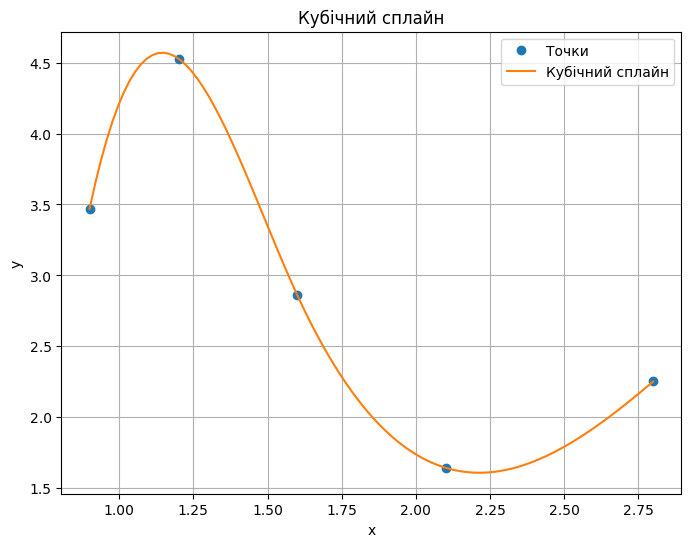

In [2]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

x = np.array([0.9, 1.2, 1.6, 2.1, 2.8])
y = np.array([3.47, 4.53, 2.86, 1.64, 2.25])
n = len(x) - 1

h = np.diff(x)
a = y
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n)
alpha = np.zeros(n)
for i in range(1, n):
    alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1])

l = np.ones(n)
mu = np.zeros(n)
z = np.zeros(n)
for i in range(1, n):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
    mu[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]
for j in range(n - 2, -1, -1):
    c[j] = z[j] - mu[j] * c[j+1]
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])

for i in range(n):
    print(f"Відрізок {i+1}:")
    print(f"S_{i}(x) = {a[i]} + {b[i].round(4)}(x - {x[i]}) + {c[i].round(4)}(x - {x[i]})^2 + {d[i].round(4)}(x - {x[i]})^3, x належить [{x[i]}, {x[i+1]}]")

cs = CubicSpline(x, y)

x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)

for i in range(len(x_new)):
    print(f"x = {x_new[i]:.2f}, y = {y_new[i]:.3f}")

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Точки')
plt.plot(x_new, y_new, label='Кубічний сплайн')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн')
plt.legend()
plt.grid(True)
plt.show()
